## Lógica de programação II - Programação Funcional I

Na aula de hoje iremos explorar os seguintes tópicos em Python:

- Expressões geradoras
- Funções anônimas (lambda)
- Filter
- Map
- Reduce

### Funções geradoras

Expressões gerados são uma forma compacta de criar iteradores. 

Funções geradoras são parecidas com funções convencionais, mas no lugar de `return` utilizamos a palavra `yield`.

A função irá retornar um iterador, e iremos utilizar a função `next` para pegar o próximo resultado.

In [ ]:
import sys
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

In [ ]:
# Definindo uma função geradora
def funcao_geradora():
  print('Primeiro passo')
  yield 1
  print('Segundo passo')
  yield 2
  print('Terceiro passo')
  yield 3
  print('Quarto passo')
  yield 4
  print("fim")

In [ ]:
gerador = funcao_geradora()

In [ ]:
print(gerador)

<generator object funcao_geradora at 0x7f47b47a1550>


In [ ]:
print(next(gerador))

Primeiro passo
1


In [ ]:
print(next(gerador))

Segundo passo
2


In [ ]:
print(next(gerador))

Terceiro passo
3


In [ ]:
print(next(gerador))

Quarto passo
4


In [ ]:
print(next(gerador))

fim


StopIteration: ignored

In [ ]:
print(next(gerador))

StopIteration: ignored

**Quanto não houver mais `yield` ocorre uma excessão `StopIteraction`**

Porém perceba que a palavra `fim` foi imprimida, ou seja a função é executada, porém sem retorno.

Podemos mimetizar a função range de python!

In [ ]:
def my_range(k):
  x = 0
  while x < k:
    print(f'Inicio, k={k}, x={x}')
    yield x
    x +=1
    print(f'Depois do yield, k={k}, x={x}')


In [ ]:
# Instanciando nossa função de range definida acima
mrange = my_range(5)

In [ ]:
mrange

<generator object my_range at 0x7f47b4852450>

In [ ]:
next(mrange)

Inicio, k=5, x=0


0

In [ ]:
next(mrange)

Depois do yield, k=5, x=1
Inicio, k=5, x=1


1

In [ ]:
next(mrange)

Depois do yield, k=5, x=2
Inicio, k=5, x=2


2

In [ ]:
next(mrange)

Depois do yield, k=5, x=3
Inicio, k=5, x=3


3

In [ ]:
next(mrange)

Depois do yield, k=5, x=4
Inicio, k=5, x=4


4

In [ ]:
next(mrange)

Depois do yield, k=5, x=5


StopIteration: ignored

In [ ]:
list(range(5))

[0, 1, 2, 3, 4]

**Geradores** apresentam um padrão preguiçoso.

Ou seja, o código não é executado até que seja necessário. Esse é um padrão diferente das funções que criamos até agora, em que todo o código era executado assim que fosse solicitado (eager evaluation).

Quando temos problemas de memória, é comum utilizarmos os geradores. Quando a memória não é um problema, optamos pelo *eager evaluation* por apresentar, em geral, uma performance melhor.

Geradores são muito interessantes e apresentam algumas vantagens como publish-subscribe.

Para saber mais temos [essa palestra do PyCon de David Beazley em inglês](https://www.youtube.com/watch?v=D1twn9kLmYg)

In [ ]:
def pegue_tamanho(opt, k):
  if opt == 'lista':
    return sys.getsizeof(list(range(k)))
  else:
    return sys.getsizeof(range(k))

In [ ]:
range_size = []
list_size = []
for n in range(1, 10_000):
  range_size.append(pegue_tamanho('range', n))
  list_size.append(pegue_tamanho('lista', n))


In [ ]:
df = pd.DataFrame({
    'lista': list_size,
    'range': range_size
}).reset_index()



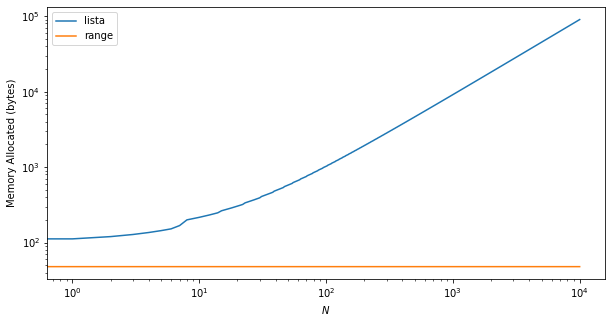

In [ ]:
f, ax = plt.subplots(figsize=(10,5))
sns.lineplot(
    x='index',
    y='lista',
    data=df,
    label='lista'
)
sns.lineplot(
    x='index',
    y='range',
    data=df,
    label='range'
)
ax.set(xscale='log')
ax.set(yscale='log')
ax.set_ylabel('Memory Allocated (bytes)')
ax.set_xlabel('$N$')
plt.legend()
plt.show()


Esse comportamento ocorre por quê não geramos uma lista de fato com o generators. Ela apenas pode existir assim que executamos o código (next)!

**Podemos criar funções com generatos com for loops**

In [ ]:
# Criando um gerador de fibonnaci
def fib_gen(k):
  a = 0
  b = 1
  for n in range(k):
    print(a, b)
    yield a
    temp = a
    a = b
    b = temp + b

for i in fib_gen(10):
  print(i)

0 1
0
1 1
1
1 2
1
2 3
2
3 5
3
5 8
5
8 13
8
13 21
13
21 34
21
34 55
34


Semelhante a compreensão de listas podemos criar geradores de uma linha

In [ ]:
quadrado_lista = [x**2 for x in range(10)]
print(quadrado_lista)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [ ]:
# Utilizamos o `()` para iniciar o gerador
quadrado_gen = (x**2 for x in range(10))
print(quadrado_gen)

<generator object <genexpr> at 0x7f47b45379d0>


In [ ]:
for quadrado in quadrado_gen:
  print(quadrado)

0
1
4
9
16
25
36
49
64
81


In [ ]:
# Gerando uma lista a partir de um gerador
quadrado_lista_gen = list((x**2 for x in range(10)))
print(quadrado_lista_gen)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


E segue a mesma lógica que list comprehension 

Com `if`:

`(<expressão> for <variavel> in <iteravel> if <condicao>`

In [ ]:
par_gen = (num for num in range(10) if num % 2 == 0)
for par in par_gen:
  print(par)

0
2
4
6
8


In [ ]:
par_impar_gen = (
    f"{num} é par" if num % 2 == 0 else f"{num} é impar" for num in range(10) 
)

for valor in par_impar_gen:
  print(valor)

0 é par
1 é impar
2 é par
3 é impar
4 é par
5 é impar
6 é par
7 é impar
8 é par
9 é impar


Uma vantagem dos geradores é quando queremos reduzir um valor

In [ ]:
%%time
gen = (i**2 for i in range(10_000_000))
sum(gen)

CPU times: user 3.24 s, sys: 52 µs, total: 3.24 s
Wall time: 3.26 s


333333283333335000000

In [ ]:
%%time
lista = (i**2 for i in range(10_000_000))
sum(lista)

CPU times: user 3.18 s, sys: 0 ns, total: 3.18 s
Wall time: 3.22 s


333333283333335000000

Apesar do tempo ser parecido, com geradores há um menor consumo de memória!

In [ ]:
def transforme_caixa_alta(lista_palavras):
  for palavra in lista_palavras:
    yield palavra.upper()

lista = ['banana', 'maca', 'uva']
caixa_alta = transforme_caixa_alta(lista)
print(caixa_alta)
print(next(caixa_alta))
print(next(caixa_alta))
print(next(caixa_alta))
print(next(caixa_alta))

<generator object transforme_caixa_alta at 0x7f47cd461f50>
BANANA
MACA
UVA


StopIteration: ignored

In [ ]:
caixa_alta = transforme_caixa_alta(lista)
for palavra in caixa_alta:
  print(palavra)

BANANA
MACA
UVA


### Funções anônimas (lambda)

Funções anônimas, também conhecidas como funções lambda (ou lambda calculus). São funções que não necessáriamente precisam ser declaras, no caso de Python declaramos uma função com a palavra reservada `def`.

De onde vem:
- Inventado por Alonzo Church (1903-1995), supervisor de Allan Turing
  - O que é a noção de uma função de uma perspectiva computacional?
- Para Church uma função é uma caixa preta

Input -> Função -> Resultado

Inputs (X, Y) -> Função -> Resultado

Por ser uma caixa preta, não podemos analisar internamente.

Essas funções não guardam um estado interno, não há informações escondidas.

`lambda x: x+1`

`lambda x, y: x+y`

Em outras palavras, a função aceita algum parâmetro (input), realiza uma operação e retorna um valor e apenas um valor (int, float, list, tuplas).

Por que deveriamos estar interessados no lambda calculus?

- Pode encodar qualquer computação
  - Qualquer programa/função desenvolvida pode ser codificada utilizando o lambda calculus, note que pode ser extremamente ineficiente! Este não é o ponto, essa é uma idéia básica de computação, demonstrando que qualquer programa pode ser codificada dessa forma (Church-Turing hypothesis).
- É a base para linguagens de programação funcional (Haskell). Nessa linguagem, compila o código em partes pequenas, que são essencialmente uma forma de calculo lambda.
- Presente na maior parte de linguagens de programação (Python, C#, Java, etc).

Na programação funcional utilizamos muitas vezes a recursão de uma função, uma função que chama ela mesma até um estado pré-definido. 

Nos paradigmas de desenvolvimento de software temos a programação imperativa e declarativa.

![a](https://res.cloudinary.com/practicaldev/image/fetch/s--j_Sv4k3Y--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://dev-to-uploads.s3.amazonaws.com/uploads/articles/1r3e3w4xgj30b81zb4yu.png)

Computação
- Imperativa:
  - Instruções são descritas passo a passo de como o programa deve ser executado
- Declarativa:
  - As condições dos gatilhos de execução são ajustados para produção do resultado esperado (base case)

Leitura e complexidade
- Imperativa:
  - Foco no controle de fluxo, o passo-a-passo pode ser seguido de forma simples. Entretanto, adição de novas features e de código podem se tornar complexas, tornando o código confuso e consumir tempo para a leitura
- Declarativa
  - Passo-a-passo são evitados (recursão). É menos complexo e requer menos código, facilitando a leitura

Customização
- Imperativa
  - Fácil customização e edição de código. Controle completo de fácil adaptação a novas estruturas. Entretanto, mais código deverá ser produzido, podendo acarretar em maior número de erros (bugs)
- Declaritiva
  - Customização do código é mais dificil, por causa da sintaxe e dependências para a implemenação do código.

Optimização:
- Imperativa
  - Dificil de optimizar em comparação com a declarativa. Requer que o passo-a-passo seja investigado, requerindo mais código e maior possibilidade de cometer erros
- Declarativa
  - Fácil optimização do código

Estrutura:
- Imperativa
  - Pode ser longo e complexo. Por falta de boas práticas uma função pode performar mais de uma atividade
- Declarativa
  - Concisa e precisa, com falta de detalhes. Limita a complexidade do código e torna ele mais eficiente


**A sintaxe para a função lambda em Python é:**

`lambda <param>, <param2>, ...: <expressao>`

In [ ]:
# Declarando uma função
def quadrado(x):
  return (x**2)

print(quadrado)
print(quadrado(2))
print(quadrado(4))
print(quadrado(3))

<function quadrado at 0x7f47b3e3b680>
4
16
9


In [ ]:
# Com função lambda
quadrado_lambda = lambda x: x**2
print(quadrado_lambda)
print(quadrado_lambda(2))
print(quadrado_lambda(4))
print(quadrado_lambda(3))

<function <lambda> at 0x7f47b3e3b7a0>
4
16
9


In [ ]:
# Lambda com dois parâmetros
soma = lambda x, y: x + y
soma(3, 4)

7

In [ ]:
# Precisamos passar os parâmetros para a função de forma correta
# Se não gera um erro, assim como nas funções declaradas `def`
soma(3)

TypeError: ignored

In [ ]:
is_impar = lambda x: False if x%2==0 else True
is_par = lambda x: True if x%2==0 else False
numero = 2
print(f'{numero} é ímpar?', is_impar(numero))
print(f'{numero} é par?', is_par(numero))

2 é ímpar? False
2 é par? True


In [ ]:
# Aceita qualquer tipo de dado
multipla_numeros = lambda ls: [x*idx for idx, x in enumerate(ls)]
print(multipla_numeros([10, 20, 4, 5]))

[0, 20, 8, 15]


In [ ]:
meses = [
    'Jan',
    'Fev',
    'Mar',
    'Abr',
    'Mai',
    'Jun',
    'Jul',
    'Ago',
    'Set',
    'Out',
    'Nov',
    'Dez'
]

mes_dict = {
    idx: mes for idx, mes in enumerate(meses, start=1)
}
num_para_mes = lambda num, mes_dict: mes_dict[num]
print(num_para_mes(8, mes_dict))

# Porém poderiamos ter feito:
print(mes_dict[8])

Ago
Ago


In [ ]:
# Podemos passar funções como argumentos
def soma_numeros(a, b):
  return a + b

def subtrai_numeros(a, b):
  return a - b

calcula_multiplica = lambda funcao, a, b, fator: funcao(a,b) * fator
print('soma', calcula_multiplica(soma_numeros, 4, 5, 10))
print('subtrai', calcula_multiplica(subtrai_numeros, 4, 5, 10))

soma 90
subtrai -10


In [ ]:
soma = lambda a, b: a+b
subtracao = lambda a, b: a-b
divisao = lambda a,b: a/b

a = 10
b = 20
c = 10
d = 2
resultado = soma(a,b)
print(resultado)
resultado = subtracao(resultado, c)
print(resultado)
resultado = divisao(resultado, d)
print(resultado)

30
20
10.0


O código acima pode ser pensado como:

`h(g(f(x)))`

Ou:

`divisao( subtracao ( soma (a, b ), c ), d )`

`divisao ( subtracao (resultado_soma, c ), d ) `

`divisao ( resultado_subtracao, d )`


In [ ]:
resultado = divisao(subtracao(soma(a,b), c), d)
resultado

10.0

### Filter

A função filter permite que filtremos os dados apenas verdadeiros dado uma expressão


A sintaxe utilizada é:

`filter(<função>, <iteravel>)`

In [ ]:
is_par = lambda x: x % 2 == 0
numeros = [3, 6, 4, 72, 27, 31, 42]
# O filter retorna um gerador
print(filter(is_par, numeros))
# A lista filtrada de número que retornaram verdadeiro para a função `is_par`
print(list(filter(is_par, numeros)))

[6, 4, 72, 42]


In [ ]:
cadastros = [
    {
     'produto': 'P1',
     'preco': 10.29,
     'categoria': 'moda'
  },
    {
     'produto': 'P2',
     'preco': 3.29,
     'categoria': 'moda'
  },
    {
     'produto': 'P3',
     'preco': 5.00,
     'categoria': 'alimento'
  },
    {
     'produto': 'P4',
     'preco': 7.25,
     'categoria': 'alimento'
  },
    {
     'produto': 'P5',
     'preco': 40.00,
     'categoria': 'moda'
  },
    {
     'produto': 'P6',
     'preco': 1.99,
     'categoria': 'alimento'
  },
]

In [ ]:
is_moda = lambda dc: dc['categoria'] == "moda"
is_alimento = lambda dc: dc['categoria'] == "alimento"

# Filtrando cadastros por moda
print('moda', list(filter(is_moda, cadastros)))
# Filtrando cadastros por alimentos
('alimentos', list(filter(is_alimento, cadastros)))

moda [{'produto': 'P1', 'preco': 10.29, 'categoria': 'moda'}, {'produto': 'P2', 'preco': 3.29, 'categoria': 'moda'}, {'produto': 'P5', 'preco': 40.0, 'categoria': 'moda'}]


('alimentos',
 [{'produto': 'P3', 'preco': 5.0, 'categoria': 'alimento'},
  {'produto': 'P4', 'preco': 7.25, 'categoria': 'alimento'},
  {'produto': 'P6', 'preco': 1.99, 'categoria': 'alimento'}])

In [ ]:
# O mesmo processo com compreesões de lista
[prod for prod in cadastros if prod['categoria'] == 'moda']

[{'produto': 'P1', 'preco': 10.29, 'categoria': 'moda'},
 {'produto': 'P2', 'preco': 3.29, 'categoria': 'moda'},
 {'produto': 'P5', 'preco': 40.0, 'categoria': 'moda'}]

In [ ]:
# Podemos utilizar compreensões de lista com o lambda
[prod for prod in cadastros if is_moda(prod)]

[{'produto': 'P1', 'preco': 10.29, 'categoria': 'moda'},
 {'produto': 'P2', 'preco': 3.29, 'categoria': 'moda'},
 {'produto': 'P5', 'preco': 40.0, 'categoria': 'moda'}]

### Map

A função `map` permite que a gente mapeie uma função a ser aplicada a cada elemento da nossa coleção.

Assim como no `filter` ele retorna um iterador, precisando ser convertido o resultado no formato que queremos!

A sintaxe é:
`map(<funcao>, <iteravel>`)

In [ ]:
def eleva_quadrado(x):
  return x**2

numeros = [1, 10, 20, 13, 17]
# Mapeando a função `eleva_quadrado` para cada elemento da lista `numeros`
# Ou seja aplicando a função `eleva_quadrado` para cada número
numeros_quadrado = list(map(eleva_quadrado, numeros))
print(numeros_quadrado)

# Realizando o mesmo processo com `for` loop
numeros_quadrado_for = []
for num in numeros:
  resultado = eleva_quadrado(num)
  numeros_quadrado_for.append(resultado)
print(numeros_quadrado_for)

# Resultado similar com compreensões lista
print([x**2 for x in numeros])

# E geradores incluso
print(list((x**2 for x in numeros)))

[1, 100, 400, 169, 289]
[1, 100, 400, 169, 289]
[1, 100, 400, 169, 289]
[1, 100, 400, 169, 289]


In [ ]:
# Podemos combinar o filter com o map
is_par = lambda x: x%2 == 0
def eleva_quadrado(x):
  return x**2

numeros = [1, 10, 20, 13, 17, 14, 42, 31, 28]
numeros_pares_quadrado = list(
    map(eleva_quadrado,
        filter(
            is_par, numeros
        )
    )
)
print(numeros_pares_quadrado)

# Com compressões de lista
print([x**2 for x in numeros if x % 2 == 0])

# Com compressões de lista e funções para verificar se Falso/Verdadeiro
print([x**2 for x in numeros if is_par(x)])

[100, 400, 196, 1764, 784]
[100, 400, 196, 1764, 784]
[100, 400, 196, 1764, 784]


In [ ]:
# Pegando os preços
cadastros

[{'produto': 'P1', 'preco': 10.29, 'categoria': 'moda'},
 {'produto': 'P2', 'preco': 3.29, 'categoria': 'moda'},
 {'produto': 'P3', 'preco': 5.0, 'categoria': 'alimento'},
 {'produto': 'P4', 'preco': 7.25, 'categoria': 'alimento'},
 {'produto': 'P5', 'preco': 40.0, 'categoria': 'moda'},
 {'produto': 'P6', 'preco': 1.99, 'categoria': 'alimento'}]

In [ ]:
pega_preco = lambda dc: dc['preco']

preco_itens_moda = list(
    map(pega_preco,
        filter(
            is_moda, cadastros
            )
        )
)
print(preco_itens_moda)

[10.29, 3.29, 40.0]


In [ ]:
# Com compreensões de lista
[cadastro['preco'] for cadastro in cadastros if cadastro['categoria'] == 'moda']

[10.29, 3.29, 40.0]

In [ ]:
# Misturar a condiconal para ficar mais fácil a leitura
[cadastro['preco'] for cadastro in cadastros if is_moda(cadastro)]

[10.29, 3.29, 40.0]

In [ ]:
# Map com múltiplas listas
soma = lambda a, b: a + b
list(map(soma, [1,2,3], [4, 5, 6]))

[5, 7, 9]

In [ ]:
[a+b for a,b in zip([1,2,3], [4,5,6])]

[5, 7, 9]

### Reduce

O `reduce` permite a gente a reduzir os dados em uma única saída! Como parâmetros um valor inicial (acumulador), além da função de redução e do iterável.

A sintaxe é:
`reduce(<funcao>, <iteravel>, <valor inicial>)`

In [ ]:
# Importando o reduce
from functools import reduce

soma = lambda resultado, numero: resultado + numero

lista = [1, 3, 5, 6]
resultado = reduce(soma, lista, 0) # Neste caso valor inicial é 0
print(resultado)

15


No caso acima estamos realizando a operação

`(0+1) -> 1`

`(1+3) -> 4`

`(4+5) -> 9`

`(9+6) -> 15`

ou

`((((0+1)+3)+5)+6)`

In [ ]:
# Modificando o valor inicial
resultado = reduce(soma, lista, 5) # Neste caso valor inicial é 5
print(resultado)

20


In [ ]:
strings = ['banana', 'maca', 'uva']
# Concatenando strings com o reduce
print('reduce:', reduce(soma, strings, ""))

# Concatenando strings com join
print('join:', ''.join(strings))

print('-'*20)
print(reduce(soma, strings, "Hoje"))

reduce: bananamacauva
join: bananamacauva
--------------------
Hojebananamacauva


O `reduce` é interessante para separar uma estrutura complexa criando uma hierarquia de dados (chaves)!

Por exemplo:  
Queremos ter um acesso rápido dos dados do dicionário `cadastros` por categoria

In [ ]:
cadastros

[{'produto': 'P1', 'preco': 10.29, 'categoria': 'moda'},
 {'produto': 'P2', 'preco': 3.29, 'categoria': 'moda'},
 {'produto': 'P3', 'preco': 5.0, 'categoria': 'alimento'},
 {'produto': 'P4', 'preco': 7.25, 'categoria': 'alimento'},
 {'produto': 'P5', 'preco': 40.0, 'categoria': 'moda'},
 {'produto': 'P6', 'preco': 1.99, 'categoria': 'alimento'}]

In [ ]:
def separa_categorias(dicionario, cadastro):
  # O dicionário é o acumulador no reduce
  # cadastro é um elemento da lista de dicionários
  categoria = cadastro['categoria']
  if categoria in dicionario.keys():
    # Se a categoria estiver presente
    # Adicionamos o elemento `cadastro` a lista da categoria
    dicionario[categoria].append(cadastro)
  else:
    # Adicionando a chave no dicionario em que este é a
    # categoria e o valor uma lista com o elemento cadastro
    dicionario[categoria] = [cadastro]
  return dicionario

In [ ]:
dicionario = {}
cadastro = cadastros[0]
print(dicionario)
print(cadastro)
print('-'*32)
dicionario = separa_categorias(dicionario, cadastro)
print(dicionario)
print('-'*32)
dicionario = separa_categorias(dicionario, cadastro)
print(dicionario)
print('-'*32)

{}
{'produto': 'P1', 'preco': 10.29, 'categoria': 'moda'}
--------------------------------
{'moda': [{'produto': 'P1', 'preco': 10.29, 'categoria': 'moda'}]}
--------------------------------
{'moda': [{'produto': 'P1', 'preco': 10.29, 'categoria': 'moda'}, {'produto': 'P1', 'preco': 10.29, 'categoria': 'moda'}]}
--------------------------------


In [ ]:
cadastros_categoria = reduce(separa_categorias, cadastros, {})

In [ ]:
cadastros_categoria

{'moda': [{'produto': 'P1', 'preco': 10.29, 'categoria': 'moda'},
  {'produto': 'P2', 'preco': 3.29, 'categoria': 'moda'},
  {'produto': 'P5', 'preco': 40.0, 'categoria': 'moda'}],
 'alimento': [{'produto': 'P3', 'preco': 5.0, 'categoria': 'alimento'},
  {'produto': 'P4', 'preco': 7.25, 'categoria': 'alimento'},
  {'produto': 'P6', 'preco': 1.99, 'categoria': 'alimento'}]}

In [ ]:
for categoria, cadastro in cadastros_categoria.items():
  print('Categoria:', categoria)
  precos = list(map(lambda dc: dc["preco"], cadastro))
  print(f'Preco médio: R${sum(precos) / len(precos):.2f}')
  print(f'Valor mais alto: R${max(precos):.2f}')
  print(f'Valor mais baixo: R${min(precos):.2f}')
  print('-'*32)

Categoria: moda
Preco médio: R$17.86
Valor mais alto: R$40.00
Valor mais baixo: R$3.29
--------------------------------
Categoria: alimento
Preco médio: R$4.75
Valor mais alto: R$7.25
Valor mais baixo: R$1.99
--------------------------------


![a](https://miro.medium.com/max/828/1*yD7P1I36G1jTProLQwEXxA.jpeg)